In [6]:
import pandas as pd
import numpy as np


In [7]:
xls=pd.ExcelFile(r"C:\Users\Arjun-Meka\Documents\HospitalDatabase.xlsx")
# xls = pd.ExcelFile('path_to_file.xls')
df_Patients = pd.read_excel(xls, 'Patients')
df_EDVisits = pd.read_excel(xls, 'EDVisits')
df_AmbulatoryVisits = pd.read_excel(xls, 'AmbulatoryVisits')
df_ReAdmissionRegistry = pd.read_excel(xls, 'ReAdmissionRegistry')
df_Discharges = pd.read_excel(xls, 'Discharges')
df_Providers= pd.read_excel(xls, 'Providers')
df_EDUnique= pd.read_excel(xls, 'EDUnique')
xls.sheet_names



['Patients',
 'EDVisits',
 'AmbulatoryVisits',
 'ReAdmissionRegistry',
 'Discharges',
 'Providers',
 'EDUnique']

In [8]:
# 33.Using a bar chart, which Service had the lowest count of Expected Mortality?

In [9]:
#to get the minimum/lowest values for each service
df_EMor= df_Discharges[df_Discharges['ExpectedMortality'] == df_Discharges.groupby('Service')['ExpectedMortality'].transform('min')]
#to reset the index
df_reset=df_EMor.reset_index(drop=True)
df_sorted= df_reset.sort_values('ExpectedMortality')


In [10]:
import seaborn as sns
# Defining the plot size
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
plots = sns.barplot(x="Service", y="ExpectedMortality", data=df_sorted)
 
# Iterrating over the bars one by one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
    plots.annotate(format(bar.get_height(), '.6f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    # Setting the label for x-axis
plt.xlabel("Service", size=14)
 
# Setting the label for y-axis
plt.ylabel("ExpectedMortality", size=14)
 
# Setting the title for the graph
plt.title("Serivce with lowest Expected Mortality")
 
# Finally showing the plot
plt.show()

#the Answer is "General Medicine"

NameError: name 'plt' is not defined

In [11]:
#34)np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17

y=np.arange(1,31).reshape(6,5)
y[2:4, 0:2]

array([[11, 12],
       [16, 17]])

In [12]:
#35)np.arange(1,31).reshape(6,5), find array slicing for elements 2,8,14,20
diag=np.arange(1,31).reshape(6,5)
np.diag(diag,k=1)

array([ 2,  8, 14, 20])

In [13]:
#36)Create a correlation matrix on EDVisits

df_EDVisits.head()

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted


In [14]:
df_EDVisits.corr()

,EDVisitID,PatientID,Acuity
EDVisitID,1.000000,0.975477,0.005813
PatientID,0.975477,1.000000,0.003545
Acuity,0.005813,0.003545,1.000000


<AxesSubplot:>

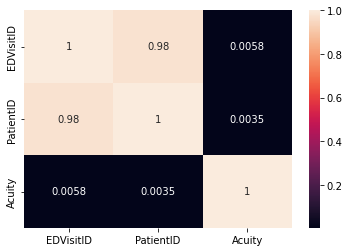

In [15]:
corrMatrix = df_EDVisits.corr()
sns.heatmap(corrMatrix, annot=True)


In [16]:
#to identify correlation between both numerical and categorical,we make use of library called dython

pip install dython


SyntaxError: invalid syntax (90897459.py, line 3)

In [17]:
#to identify categorical features
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df_EDVisits)
categorical_features

['ReasonForVisit', 'EDDisposition']

In [18]:
#It calculates the correlation/strength-of-association of features in the data-set with both categorical and
#continuous features using: Pearson’s R for continuous-continuous cases, Correlation Ratio for 
#categorical-continuous cases, Cramer’s V or Theil’s U for categorical-categorical cases.

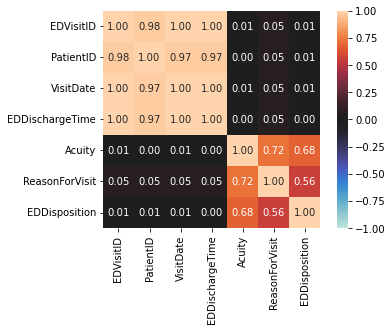

{'corr':                  EDVisitID  PatientID  VisitDate  EDDischargeTime    Acuity  \
 EDVisitID         1.000000   0.975477   0.999880         0.997646  0.005813   
 PatientID         0.975477   1.000000   0.974286         0.972431  0.003545   
 VisitDate         0.999880   0.974286   1.000000         0.997729  0.005620   
 EDDischargeTime   0.997646   0.972431   0.997729         1.000000  0.003313   
 Acuity            0.005813   0.003545   0.005620         0.003313  1.000000   
 ReasonForVisit    0.051898   0.048944   0.051850         0.053280  0.720717   
 EDDisposition     0.006640   0.007777   0.006321         0.002162  0.675967   
 
                  ReasonForVisit  EDDisposition  
 EDVisitID              0.051898       0.006640  
 PatientID              0.048944       0.007777  
 VisitDate              0.051850       0.006321  
 EDDischargeTime        0.053280       0.002162  
 Acuity                 0.720717       0.675967  
 ReasonForVisit         1.000000       0.561935  


In [19]:
associations(df_EDVisits, nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', 
             num_num_assoc='pearson', 
             ax=None, figsize=None, annot=True, fmt='.2f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, 
             plot=True, compute_only=False, clustering=False, title=None, filename=None)

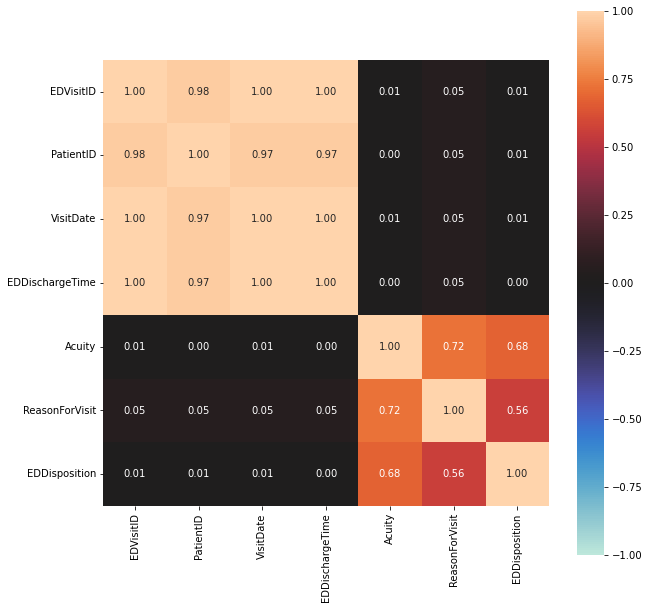

C:\Users\Arjun-Meka\AppData\Local\Temp\ipykernel_27228\1499895615.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
EDVisitID,1.00,0.98,1.00,1.00,0.01,0.05,0.01
PatientID,0.98,1.00,0.97,0.97,0.00,0.05,0.01
VisitDate,1.00,0.97,1.00,1.00,0.01,0.05,0.01
EDDischargeTime,1.00,0.97,1.00,1.00,0.00,0.05,0.00
Acuity,0.01,0.00,0.01,0.00,1.00,0.72,0.68
ReasonForVisit,0.05,0.05,0.05,0.05,0.72,1.00,0.56
EDDisposition,0.01,0.01,0.01,0.00,0.68,0.56,1.00


In [20]:
complete_correlation= associations(df_EDVisits, filename= 'complete_correlation.png', figsize=(10,10))
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

In [21]:
#37)Write a function to print all the upper case letter of a given sentence

# user input
test_str=input("Enter a sentence")
  
# printing the inputted sentence
print("The sentence entered is : " + str(test_str))
  
# Extract Upper Case Characters

res = list(filter(lambda c: c.isupper(), test_str))
  
# printing result 
print("The uppercase characters in the sentence are : " + str(res))

Enter a sentence
The sentence entered is : 
The uppercase characters in the sentence are : []


In [22]:
#38)Number of patients on 'Transfer' based on primary diagnosis
df_ReAdmissionRegistry.head()
df_ReAdmissionRegistry.groupby(['PrimaryDiagnosis']).apply(lambda x: x[x['DischargeDisposition'] == 'Transfer' ]['DischargeDisposition'].count())

PrimaryDiagnosis
AMI                   0
Afib                  1
Broken Leg            0
Diabetes              7
Fever                 0
Flu                   2
Heart Failure         9
Hip Fracture          0
Hypertension          0
Kidney Failure        0
Knee Replacement      1
Laceration            1
Migraine              0
Pain                  1
Pneumonia             8
Spinal Cord Injury    0
Stroke                9
dtype: int64

In [23]:
#39)Get the FirstName, LastName,DateOfBirth of the Patients whose reason for 
#visit is Migraine. Use EDUnique Sheet for reason for visit

result = pd.merge(df_EDUnique, df_Patients, on='PatientID')
result.head()
df_all=result.loc[result['ReasonForVisit']=='Migraine',['PatientID','FirstName','LastName','DateOfBirth','ReasonForVisit']]
df_all.sort_values('PatientID').reset_index(drop=True)

,PatientID,FirstName,LastName,DateOfBirth,ReasonForVisit
0,2,Far,Myers,1985-11-15 02:08:42.090,Migraine
1,3,Devlin,Michael,1976-04-15 02:52:09.762,Migraine
2,12,Zonnya,Ab,1963-05-23 10:04:33.074,Migraine
3,14,Gan,Yu,1970-06-02 06:22:54.675,Migraine
4,22,Joesph,Long,1979-12-04 16:45:56.080,Migraine
...,...,...,...,...,...
111,897,Barrows,Coupland,1979-10-31 18:28:35.483,Migraine
112,908,Knox,Group,1975-08-25 22:27:50.177,Migraine
113,910,Kuvalis,Coupland,1986-05-23 19:23:27.752,Migraine
114,915,Jerrilyn,Dyson,1978-01-18 02:41:55.178,Migraine


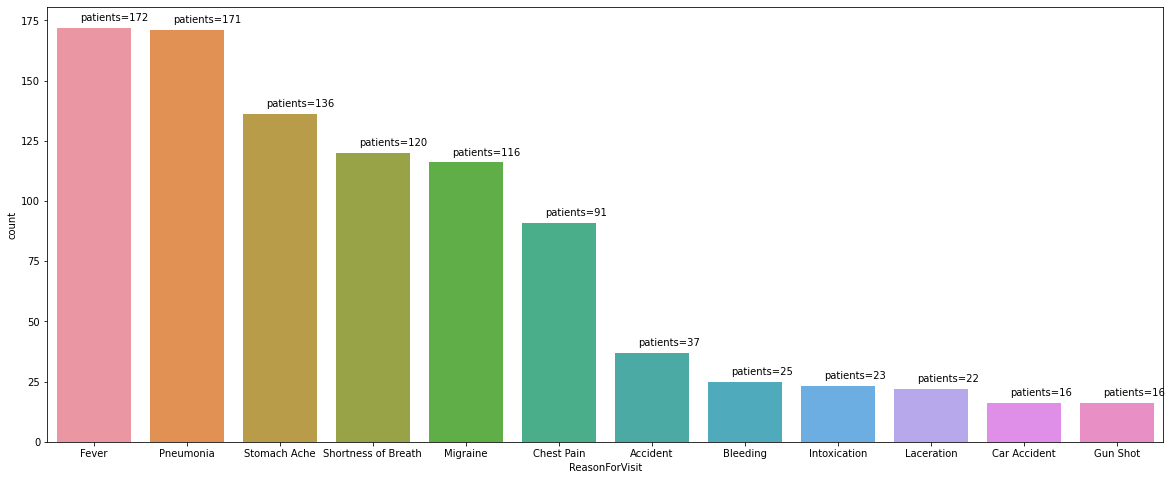

In [24]:
#40)Plot a graph showing the count of patients for the reason visited the hospotal.

import seaborn as sns
import matplotlib.pyplot as plt
 
plt.figure(figsize=(20,8))
# count plot on single categorical variable
ax=sns.countplot(x=df_EDUnique['ReasonForVisit'],data = df_EDUnique,order=df_EDUnique['ReasonForVisit'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.25, height+ 3, 'patients=%.0f'%(height))
# Show the plot
plt.show()



In [25]:
#41)Find the visit type with maximum 'No Show'

df_AmbulatoryVisits.head()
max(df_AmbulatoryVisits.groupby(['VisitType']).apply(lambda x: x[x['VisitStatus'] == 'No Show' ]['VisitType'].count()))


74